# This is done using raw features and target

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [38]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [39]:
file1 = 'AbacusCosmos_1100box.txt'
file2 = 'AbacusCosmos_1100box_planck.txt'

In [40]:
#read file using pandas
data1 = pd.read_csv(file1, sep=" ", header=None,index_col = 0)
data2 = pd.read_csv(file2, sep=" ", header=None,index_col = 0)

In [41]:
data1.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,,,,,,,,,,,,,,,,,,,,,
0.0,68.950040,62.993740,72.285620,66.219550,74.208300,71.523580,68.604320,66.668850,65.845990,72.669590,...,64.619420,69.790060,63.337290,66.115610,70.124050,73.231890,63.771890,70.546610,74.518710,71.869200
0.0,0.698315,0.669024,0.739153,0.670652,0.733331,0.706278,0.717132,0.708528,0.694629,0.718771,...,0.674386,0.702410,0.681278,0.685586,0.692022,0.713713,0.659099,0.727426,0.747050,0.725756
0.0,0.301685,0.330976,0.260847,0.329348,0.266669,0.293722,0.282868,0.291472,0.305371,0.281229,...,0.325614,0.297590,0.318722,0.314414,0.307978,0.286287,0.340901,0.272574,0.252950,0.274244
0.0,0.930033,0.982304,0.970472,0.975418,0.954402,0.954106,0.960314,0.987369,0.957165,0.931160,...,0.956390,0.976934,0.983535,0.982377,0.941344,0.962267,0.962861,0.973076,0.950712,0.953249
0.0,0.853824,0.719284,0.851027,0.858119,0.888737,0.912931,0.768274,0.733582,0.691564,0.890242,...,0.735058,0.890489,0.646633,0.743564,0.905562,0.978598,0.737968,0.825002,0.885869,0.881437


In [42]:
new_data = pd.concat([data1,data2], axis = 1)

In [43]:
new_data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,,
0.000000,68.950040,62.993740,72.285620,66.219550,74.208300,71.523580,68.604320,66.668850,65.845990,72.669590,...,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000
0.000000,0.698315,0.669024,0.739153,0.670652,0.733331,0.706278,0.717132,0.708528,0.694629,0.718771,...,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847
0.000000,0.301685,0.330976,0.260847,0.329348,0.266669,0.293722,0.282868,0.291472,0.305371,0.281229,...,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153
0.000000,0.930033,0.982304,0.970472,0.975418,0.954402,0.954106,0.960314,0.987369,0.957165,0.931160,...,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200
0.000000,0.853824,0.719284,0.851027,0.858119,0.888737,0.912931,0.768274,0.733582,0.691564,0.890242,...,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000
0.000000,-1.139198,-0.764783,-1.083356,-0.982489,-1.221581,-1.289901,-0.969291,-0.787883,-0.795959,-1.235559,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
0.011920,15809.341914,10568.146304,18681.724985,13378.118729,18656.861800,16579.401340,14648.890305,13362.988898,11458.562191,18085.618533,...,13561.852544,16092.150464,12308.224025,16759.067535,16499.169633,17125.589538,13490.302842,13458.653743,15166.950567,17335.242986
0.022847,13864.460361,9595.560755,15747.265127,12324.836666,15965.767133,14746.989689,12558.978571,11599.994643,10007.632561,15605.108012,...,13617.143844,14323.512675,15483.399389,14063.010819,12918.976422,14117.637671,14907.025190,14029.632798,14707.902784,13558.657842
0.034121,11863.536864,8351.804524,12835.591483,10928.107265,13285.724380,12760.679041,10399.724921,9580.805533,8407.381286,13143.663242,...,10778.172323,10621.403355,11724.809144,10786.540608,10829.474340,11119.621037,10620.810089,10578.477661,9798.770873,11250.083830


In [44]:
data = new_data.transpose().copy()

In [45]:
data.head()

,0.0,0.0,0.0,0.0,0.0,0.0,0.011920354120304873,0.022846800343500912,0.03412108397243786,0.04558604495028422,...,5.7406544064220375,5.752068269397013,5.763479144702299,5.774890662425512,5.78630243058408,5.797715812976249,5.809130281718272,5.820543188387072,5.831954538664276,5.843365655142046
1,68.95004,0.698315,0.301685,0.930033,0.853824,-1.139198,15809.341914,13864.460361,11863.536864,9027.403739,...,12.818603,12.773812,12.727524,12.665790,12.621257,12.573108,12.525960,12.473956,12.423609,12.379444
2,62.99374,0.669024,0.330976,0.982304,0.719284,-0.764783,10568.146304,9595.560755,8351.804524,6241.961321,...,10.117571,10.077865,10.039500,10.005285,9.971843,9.929925,9.892739,9.858199,9.825866,9.789331
3,72.28562,0.739153,0.260847,0.970472,0.851027,-1.083356,18681.724985,15747.265127,12835.591483,9689.804443,...,13.557494,13.505047,13.447689,13.395983,13.342144,13.293052,13.241906,13.195606,13.137567,13.092850
4,66.21955,0.670652,0.329348,0.975418,0.858119,-0.982489,13378.118729,12324.836666,10928.107265,8359.970418,...,14.112195,14.054219,14.001385,13.945112,13.898409,13.835032,13.790999,13.738860,13.677889,13.627670
5,74.20830,0.733331,0.266669,0.954402,0.888737,-1.221581,18656.861800,15965.767133,13285.724380,10157.472809,...,14.243636,14.178737,14.122188,14.072933,14.015208,13.956736,13.905112,13.856379,13.798439,13.743013


In [46]:
data.reset_index(drop=True,inplace=True)

In [47]:
X = data.drop(data.iloc[:,0:5],axis=1)

In [48]:
y = data.iloc[:,0:6]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [50]:
y.head()

,0.0,0.0,0.0,0.0,0.0,0.0
0,68.95004,0.698315,0.301685,0.930033,0.853824,-1.139198
1,62.99374,0.669024,0.330976,0.982304,0.719284,-0.764783
2,72.28562,0.739153,0.260847,0.970472,0.851027,-1.083356
3,66.21955,0.670652,0.329348,0.975418,0.858119,-0.982489
4,74.20830,0.733331,0.266669,0.954402,0.888737,-1.221581


In [51]:
max_depth = 40
n_estimators = 250

In [52]:
from sklearn.model_selection import cross_val_score

# def get_score(n_estimators):
#     """Return the average MAE over 5 CV folds of random forest model.
    
#     Keyword argument:
#     n_estimators -- the number of trees in the forest
#     """
#   #fit Random Forest Regressor
#     reg_rf = RandomForestRegressor(
#         n_estimators=n_estimators,
#         criterion='mse',
#         max_depth=None,
#         min_samples_split=0.5,
#         min_samples_leaf=1,
#         min_weight_fraction_leaf=0.0,
#         max_features='auto',
#         max_leaf_nodes=None,
#         min_impurity_decrease=0.0,
#         min_impurity_split=None,
#         bootstrap=True,
#         oob_score=False,
#         n_jobs=None,
#         random_state=None,
#         verbose=0,
#         warm_start=False,
#     )
#     scores = -1 * cross_val_score(reg_rf, X, y,
#                                   cv=4,
#                                   scoring='neg_mean_absolute_error')
#     return scores.mean()

In [53]:
# results = {}
# for i in range(1,10):
#     results[50*i] = get_score(50*i) # Your code here

In [54]:
# n_estimators_best = min(results, key=results.get)
# print (n_estimators_best)

In [55]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(results.keys(), results.values())
# plt.show()

In [56]:

#fit Random Forest Regressor
#depth = [10,20,30,40,50,60]
#estimators = [10,20,30,100,200,300,400]
# error = {}

# for n_estimators in range(10,500,10):
#     reg_rf = RandomForestRegressor(
#         n_estimators=n_estimators,
#         criterion='mse',
#         max_depth=500,
#         min_samples_split=0.5,
#         min_samples_leaf=1,
#         min_weight_fraction_leaf=0.0,
#         max_features='auto',
#         max_leaf_nodes=None,
#         min_impurity_decrease=0.0,
#         min_impurity_split=None,
#         bootstrap=False,
#         oob_score=False,
#         n_jobs=-1,
#         random_state=None,
#         verbose=0,
#         warm_start=False,
#     )
#     reg_rf.fit(X_train,y_train)
#     y_rf = reg_rf.predict(X_test)
#     error[n_estimators] = mean_squared_error(y_test,y_rf)
# best = min(error, key=error.get)
# print (best)    

In [57]:
# plt.plot(error.keys(),error.values())

In [58]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=35,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=True,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [59]:
reg_rf.score(X_test,y_test)

-0.8385984619354472

In [60]:
print (np.mean((y_rf - y_test)**2, axis=0))

0
0.0    8.568403
0.0    0.000554
0.0    0.000554
0.0    0.000168
0.0    0.003862
0.0    0.021754
dtype: float64


In [61]:
pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(y_rf)], axis = 1)

,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0
0,68.95004,0.698315,0.301685,0.930033,0.853824,-1.139198,65.385050,0.675494,0.324506,0.961427,0.768344,-0.869400
1,71.52358,0.706278,0.293722,0.954106,0.912931,-1.289901,67.387180,0.684912,0.315088,0.968036,0.812685,-0.998085
2,63.77189,0.659099,0.340901,0.962861,0.737968,-0.761961,70.117755,0.715965,0.284035,0.966161,0.832709,-1.030547
3,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.002182,0.683519,0.316481,0.965188,0.826565,-0.988369
4,64.07216,0.670416,0.329584,0.976326,0.775957,-0.792247,62.748180,0.645115,0.354885,0.964982,0.769882,-0.796463
5,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.260000,0.685847,0.314153,0.965200,0.830000,-1.000000
6,66.11561,0.685586,0.314414,0.982377,0.743564,-0.865620,62.748180,0.645115,0.354885,0.964982,0.769882,-0.796463
7,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.260000,0.685847,0.314153,0.965200,0.830000,-1.000000
8,65.19518,0.686572,0.313428,0.989783,0.777796,-0.827385,69.631410,0.714564,0.285436,0.963645,0.806957,-1.014790
9,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.260000,0.685847,0.314153,0.965200,0.830000,-1.000000


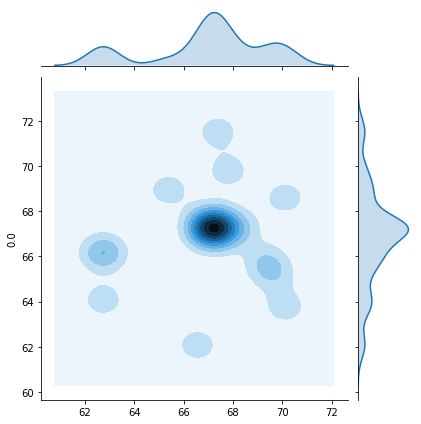

In [62]:
sns.jointplot(y_rf[:,0],y_test.iloc[:,0],kind = 'kde')

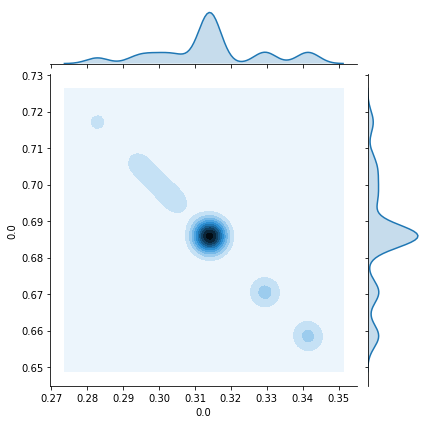

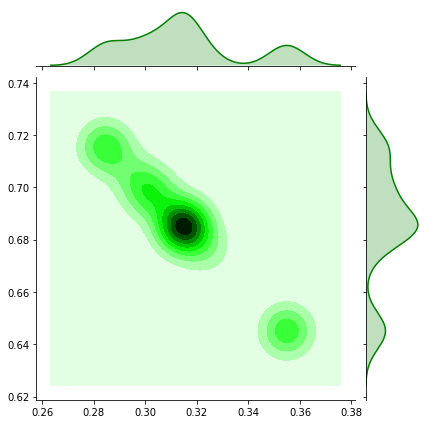

In [63]:
sns.jointplot(y_test.iloc[:,2],y_test.iloc[:,1],kind = "kde")
sns.jointplot(y_rf[:,2],y_rf[:,1],kind = 'kde',color='green')

In [64]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=10,n_estimators=200, 
                                                         learning_rate=0.5,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)
print (np.mean((y_multirf - y_test)**2, axis=0))

0
0.0    8.499988
0.0    0.000530
0.0    0.000530
0.0    0.000168
0.0    0.003824
0.0    0.022216
dtype: float64


In [65]:
multioutputregressor.score(X_test,y_test)

-0.6773945137258967

In [66]:
pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(y_multirf)], axis = 1)

,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0
0,68.95004,0.698315,0.301685,0.930033,0.853824,-1.139198,65.385239,0.675980,0.324020,0.961852,0.768677,-0.869838
1,71.52358,0.706278,0.293722,0.954106,0.912931,-1.289901,67.387276,0.684855,0.315145,0.967603,0.813005,-0.998132
2,63.77189,0.659099,0.340901,0.962861,0.737968,-0.761961,70.117050,0.714651,0.285349,0.966626,0.831700,-1.029507
3,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.259949,0.685929,0.314071,0.965150,0.830080,-1.001094
4,64.07216,0.670416,0.329584,0.976326,0.775957,-0.792247,62.751411,0.645854,0.354146,0.965150,0.769988,-0.797248
5,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.259949,0.685929,0.314071,0.965150,0.830080,-1.006545
6,66.11561,0.685586,0.314414,0.982377,0.743564,-0.865620,62.751411,0.645854,0.354146,0.965150,0.769988,-0.797248
7,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.259949,0.685929,0.314071,0.965150,0.830080,-1.000836
8,65.19518,0.686572,0.313428,0.989783,0.777796,-0.827385,69.631195,0.714702,0.285298,0.963614,0.807164,-1.014828
9,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.259949,0.685929,0.314071,0.965150,0.830080,-0.911084


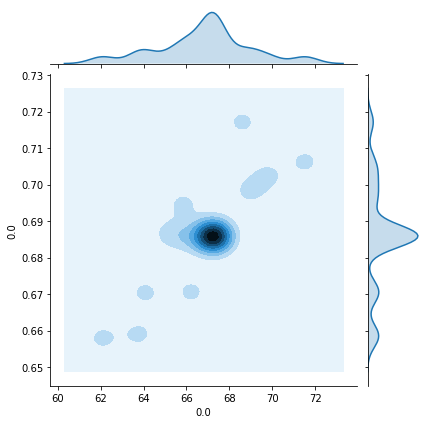

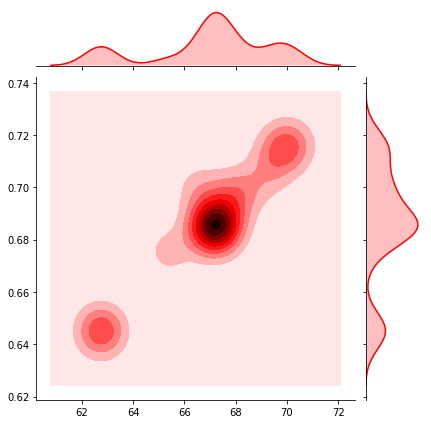

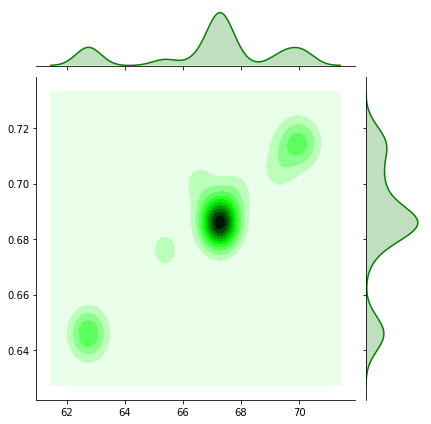

In [67]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,1],kind = "kde")
sns.jointplot(y_rf[:,0],y_rf[:,1],kind = 'kde',color='red')
sns.jointplot(y_multirf[:,0],y_multirf[:,1],kind = 'kde',color='green')

In [68]:
np.max(y.iloc[:,0])

74.79260999999998

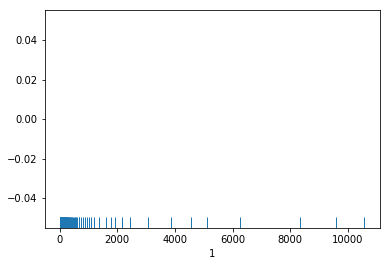

In [69]:
sns.distplot(X.iloc[1],hist=False,rug=True,kde=False)

In [70]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters = {"n_estimators":[i for i in range(50,500,50)],
    "max_depth":[None,5,10,15,20,25,30],
    "min_samples_split":[0.5],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True],
    "oob_score":[True]}

In [98]:
clf = GridSearchCV(reg_rf, parameters, cv=5)
clf.fit(X_train,y_train)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [None, 5, 10, 15, 20, 25, 30], 'min_samples_split': [0.5], 'max_features': ('auto', 'sqrt', 'log2'), 'bootstrap': [True], 'oob_score': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_bootstrap',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_split',
 'param_n_estimators',
 'param_oob_score',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [115]:
grid = clf.predict(X_test)

In [116]:
print (np.mean((grid - y_test)**2, axis=0))

0
0.0    5.171768
0.0    0.000242
0.0    0.000242
0.0    0.000184
0.0    0.003235
0.0    0.018563
dtype: float64


In [102]:
pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(grid)], axis = 1)

,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0
0,68.95004,0.698315,0.301685,0.930033,0.853824,-1.139198,67.150479,0.689077,0.310923,0.965443,0.807694,-0.957037
1,71.52358,0.706278,0.293722,0.954106,0.912931,-1.289901,70.087143,0.703955,0.296045,0.956847,0.861809,-1.107096
2,63.77189,0.659099,0.340901,0.962861,0.737968,-0.761961,67.405769,0.691856,0.308144,0.965644,0.808651,-0.960982
3,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.174386,0.689286,0.310714,0.965483,0.808098,-0.958160
4,64.07216,0.670416,0.329584,0.976326,0.775957,-0.792247,67.859864,0.692605,0.307395,0.962964,0.820819,-0.993085
5,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.174386,0.689286,0.310714,0.965483,0.808098,-0.958160
6,66.11561,0.685586,0.314414,0.982377,0.743564,-0.865620,67.859864,0.692605,0.307395,0.962964,0.820819,-0.993085
7,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.174386,0.689286,0.310714,0.965483,0.808098,-0.958160
8,65.19518,0.686572,0.313428,0.989783,0.777796,-0.827385,69.224094,0.701731,0.298269,0.960216,0.841377,-1.054589
9,67.26000,0.685847,0.314153,0.965200,0.830000,-1.000000,67.174386,0.689286,0.310714,0.965483,0.808098,-0.958160


In [103]:
print (np.mean((grid - y_test)**2, axis=0))

0
0.0    5.171768
0.0    0.000242
0.0    0.000242
0.0    0.000184
0.0    0.003235
0.0    0.018563
dtype: float64


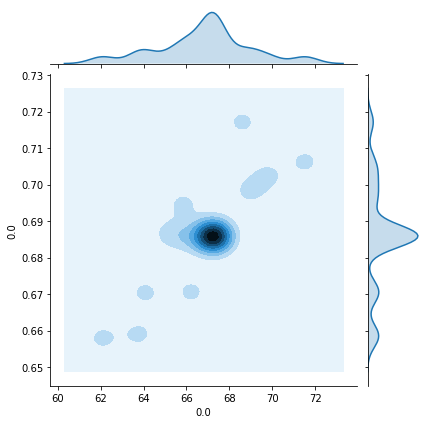

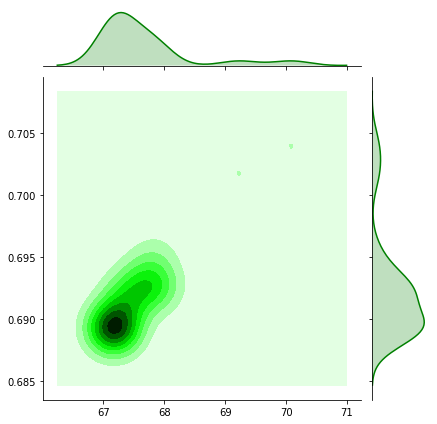

In [104]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,1],kind = "kde")
sns.jointplot(grid[:,0],grid[:,1],kind = 'kde',color='green')

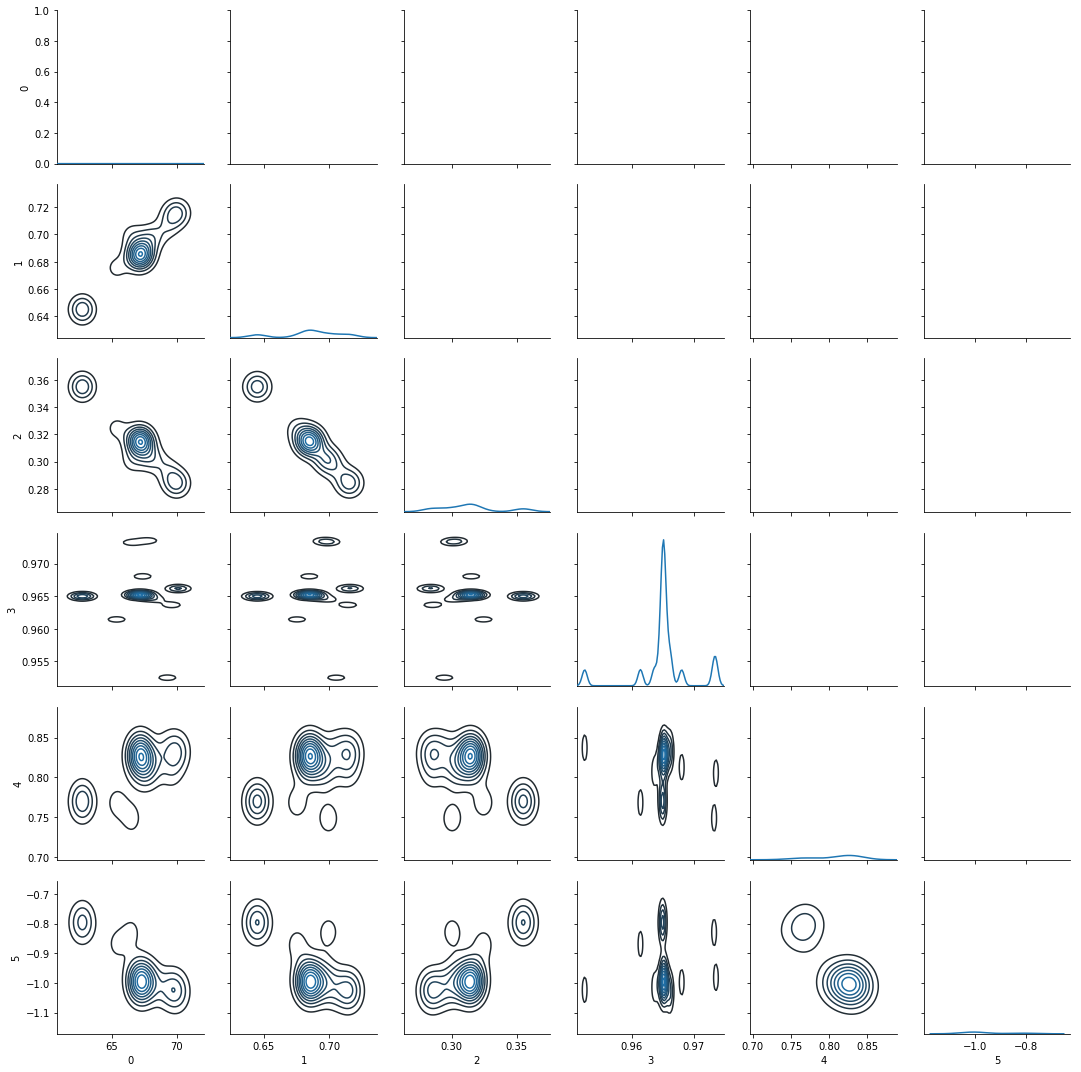

In [128]:
g = sns.PairGrid(pd.DataFrame(y_rf))
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)

In [138]:
correlation = new_data.corr()


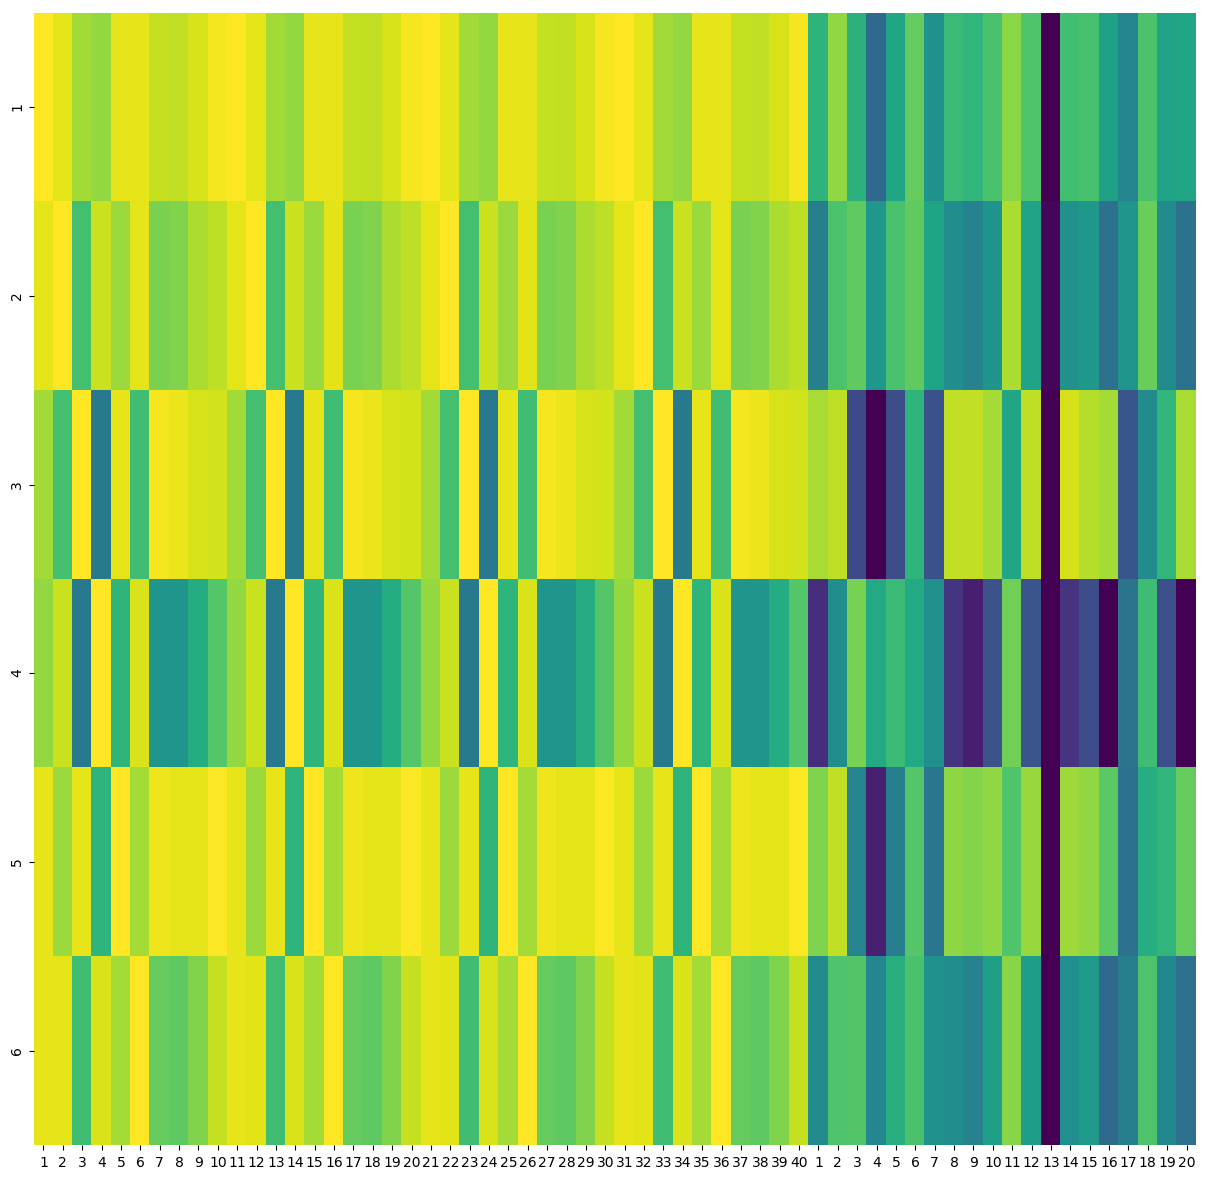

In [153]:
plt.figure(figsize = (15,15),dpi = 100)
sns.heatmap(correlation.iloc[:6,:],cmap = 'viridis',cbar = False, robust=True)

In [148]:
new_data

,1,2,3,4,5,6,7,8,9,10,...,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,,
0.000000,68.950040,62.993740,72.285620,66.219550,74.208300,71.523580,68.604320,66.668850,65.845990,72.669590,...,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000,67.260000
0.000000,0.698315,0.669024,0.739153,0.670652,0.733331,0.706278,0.717132,0.708528,0.694629,0.718771,...,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847,0.685847
0.000000,0.301685,0.330976,0.260847,0.329348,0.266669,0.293722,0.282868,0.291472,0.305371,0.281229,...,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153,0.314153
0.000000,0.930033,0.982304,0.970472,0.975418,0.954402,0.954106,0.960314,0.987369,0.957165,0.931160,...,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200,0.965200
0.000000,0.853824,0.719284,0.851027,0.858119,0.888737,0.912931,0.768274,0.733582,0.691564,0.890242,...,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000,0.830000
0.000000,-1.139198,-0.764783,-1.083356,-0.982489,-1.221581,-1.289901,-0.969291,-0.787883,-0.795959,-1.235559,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
0.011920,15809.341914,10568.146304,18681.724985,13378.118729,18656.861800,16579.401340,14648.890305,13362.988898,11458.562191,18085.618533,...,13561.852544,16092.150464,12308.224025,16759.067535,16499.169633,17125.589538,13490.302842,13458.653743,15166.950567,17335.242986
0.022847,13864.460361,9595.560755,15747.265127,12324.836666,15965.767133,14746.989689,12558.978571,11599.994643,10007.632561,15605.108012,...,13617.143844,14323.512675,15483.399389,14063.010819,12918.976422,14117.637671,14907.025190,14029.632798,14707.902784,13558.657842
0.034121,11863.536864,8351.804524,12835.591483,10928.107265,13285.724380,12760.679041,10399.724921,9580.805533,8407.381286,13143.663242,...,10778.172323,10621.403355,11724.809144,10786.540608,10829.474340,11119.621037,10620.810089,10578.477661,9798.770873,11250.083830
